In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras.layers import Lambda, Input, Dense, Dropout
from keras.models import Model
#from keras import backend as K
#from keras import regularizers
from pandas.plotting import scatter_matrix
#import argparse
#import os
from keras.losses import mse#, binary_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

In [89]:
df_atmes = pd.read_csv("americanToadPadraoMes.csv")
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

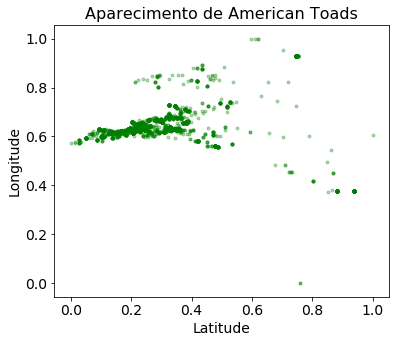

In [90]:
plt.figure(figsize=(6,5))
plt.rc('font',size=14)
plt.rc('axes',titlesize=16)
plt.scatter(df_atmes["lat"], df_atmes["lng"],marker=".",alpha='0.3',color="green")
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.title("Aparecimento de American Toads")
plt.show()

# Autoencoder

In [91]:
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)

In [92]:
input_dim = len(df_atmes.columns)
input_dim

28

In [93]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [94]:
# Cria o modelo para a rede anteriormente montada
autoencoder = Model(entrada,decoded)

In [95]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
autoencoder.compile(optimizer='adam', loss='mse')

In [96]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [97]:
batch = len(df_atmes)//10
batch

367

In [98]:
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [99]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history = autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_data=(X_testAtMes, X_testAtMes),
                callbacks=[es])

Train on 2572 samples, validate on 1103 samples
Epoch 1/10000
2572/2572 [==============================] - 1s 467us/step - loss: 0.1399 - val_loss: 0.1319
Epoch 2/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.1331 - val_loss: 0.1248
Epoch 3/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.1272 - val_loss: 0.1204
Epoch 4/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.1222 - val_loss: 0.1159
Epoch 5/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.1177 - val_loss: 0.1113
Epoch 6/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.1137 - val_loss: 0.1078
Epoch 7/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.1099 - val_loss: 0.1043
Epoch 8/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.1064 - val_loss: 0.1013
Epoch 9/10000
2572/2572 [==============================] - 0s 30us/step - loss: 0.1032 - val_loss: 0.09

2572/2572 [==============================] - 0s 20us/step - loss: 0.0089 - val_loss: 0.0075
Epoch 78/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0088 - val_loss: 0.0075
Epoch 79/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0087 - val_loss: 0.0073
Epoch 80/10000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0086 - val_loss: 0.0072
Epoch 81/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0085 - val_loss: 0.0071
Epoch 82/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0083 - val_loss: 0.0069
Epoch 83/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0082 - val_loss: 0.0068
Epoch 84/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 85/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0080 - val_loss: 0.0067
Epoch 86/10000
2572/2572 [==========================

2572/2572 [==============================] - 0s 21us/step - loss: 0.0049 - val_loss: 0.0036
Epoch 154/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0048 - val_loss: 0.0036
Epoch 155/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0047 - val_loss: 0.0036
Epoch 156/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0048 - val_loss: 0.0035
Epoch 157/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0047 - val_loss: 0.0035
Epoch 158/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0047 - val_loss: 0.0034
Epoch 159/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0046 - val_loss: 0.0034
Epoch 160/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0046 - val_loss: 0.0034
Epoch 161/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0046 - val_loss: 0.0034
Epoch 162/10000
2572/2572 [=================

Epoch 229/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 230/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0038 - val_loss: 0.0025
Epoch 231/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0038 - val_loss: 0.0025
Epoch 232/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0038 - val_loss: 0.0025
Epoch 233/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0038 - val_loss: 0.0025
Epoch 234/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0038 - val_loss: 0.0025
Epoch 235/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 236/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 237/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0037 - val_loss: 0.0025
Epoch 238/10000
2572/2572 [=

Epoch 305/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 306/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 307/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0023
Epoch 308/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 309/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0035 - val_loss: 0.0023
Epoch 310/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0035 - val_loss: 0.0023
Epoch 311/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0035 - val_loss: 0.0023
Epoch 312/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0035 - val_loss: 0.0023
Epoch 313/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 314/10000
2572/2572 [=

Epoch 381/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 382/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 383/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 384/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 385/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0030 - val_loss: 0.0020
Epoch 386/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 387/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 388/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 389/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 390/10000
2572/2572 [=

Epoch 457/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0030 - val_loss: 0.0018
Epoch 458/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 459/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0030 - val_loss: 0.0018
Epoch 460/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 461/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 462/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0031 - val_loss: 0.0019
Epoch 463/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0030 - val_loss: 0.0019
Epoch 464/10000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0029 - val_loss: 0.0019
Epoch 465/10000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 466/10000
2572/2572 [=

Epoch 533/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 534/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 535/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 536/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 537/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 538/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0028 - val_loss: 0.0017
Epoch 539/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 540/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 541/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 542/10000
2572/2572 [=

Epoch 609/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 610/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 611/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 612/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 613/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0027 - val_loss: 0.0017
Epoch 614/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 615/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 616/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 617/10000
2572/2572 [==============================] - 0s 27us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 618/10000
2572/2572 [=

Epoch 685/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 686/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 687/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 688/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 689/10000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 690/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 691/10000
2572/2572 [==============================] - 0s 16us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 692/10000
2572/2572 [==============================] - 0s 18us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 693/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 694/10000
2572/2572 [=

Epoch 761/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 762/10000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 763/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 764/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 765/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 766/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 767/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 768/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0026 - val_loss: 0.0016
Epoch 769/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 770/10000
2572/2572 [=

Epoch 837/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 838/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 839/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 840/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 841/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 842/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 843/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 844/10000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 845/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0024 - val_loss: 0.0015
Epoch 846/10000
2572/2572 [=

Epoch 913/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 914/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 915/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 916/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 917/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 918/10000
2572/2572 [==============================] - 0s 20us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 919/10000
2572/2572 [==============================] - 0s 22us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 920/10000
2572/2572 [==============================] - 0s 29us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 921/10000
2572/2572 [==============================] - ETA: 0s - loss: 0.002 - 0s 23us/step - loss: 0.0024 - val_loss: 0.0014
Epoc

2572/2572 [==============================] - 0s 20us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 989/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0023 - val_loss: 0.0014
Epoch 990/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 991/10000
2572/2572 [==============================] - 0s 26us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 992/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 993/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0024 - val_loss: 0.0015
Epoch 994/10000
2572/2572 [==============================] - 0s 24us/step - loss: 0.0025 - val_loss: 0.0015
Epoch 995/10000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 996/10000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 997/10000
2572/2572 [=================

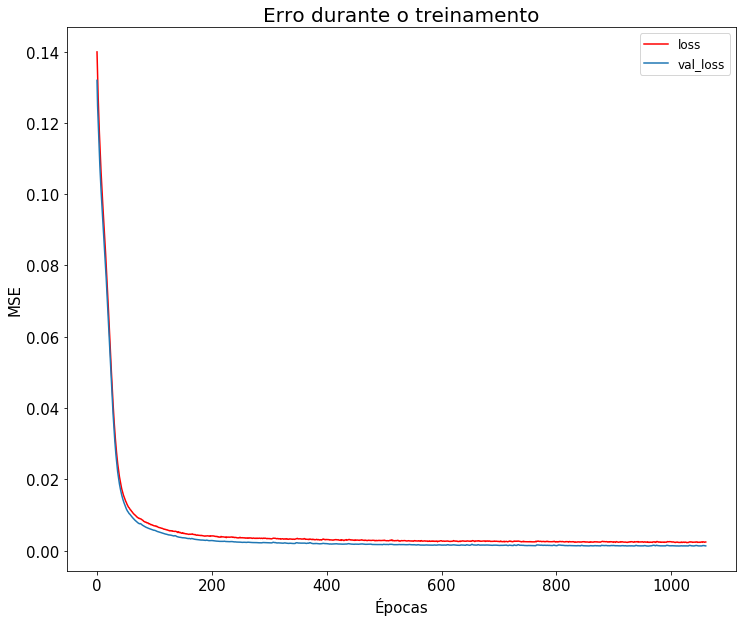

In [100]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history.history['loss'],color='r',label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [101]:
# Faz a previsão para a base de teste
testeAtMes = autoencoder.predict(X_testAtMes)

In [102]:
# Calcula o erro (MSE) para o teste
autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)
#20% de dropout: 0.0016651906830162412
#30% de dropout: 0.12273836268258981

1103/1103 [==============================] - 0s 21us/step


0.0012803849554029636

In [103]:
# Calcula o erro (MSE) para o treino
autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)
#20% de dropout: 0.0016855491797981457
#30% de dropout: 0.12279615244751399

2572/2572 [==============================] - 0s 9us/step


0.0013014427451402365

# Feature Selection

In [190]:
support

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [197]:
support[0]

False

In [192]:
# Removendo recursos com baixa variação
# Por parâmetro é passado o valor limite da variação. Os abaixo dele são cortados
# Precisamos de um valor de limite
selector = VarianceThreshold(0.05)
se = selector.fit_transform(df_atmes)
# Mostra quais passaram na seleção
support = selector.get_support()
# Cria df com o resultado
colunas = df_atmes.columns
elimi = []
for c in range(input_dim):
    if (support[c]==False):
        elimi.append(colunas[c])
for c in elimi:
    colunas = colunas.drop(c)
se = pd.DataFrame(se,columns=colunas)
se.head()

,rain,meanwdird
0,0.0,0.000000
1,0.0,0.108033
2,0.0,0.166205
3,0.0,0.889197
4,0.0,0.531856


In [177]:
elimi

['meanwindspdm', 'meandewptm', 'meantempm', 'maxhumidity']

In [16]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_pred - y_true))

In [105]:
# Calcula o erro (MSE) para o treino
scores = mean_squared_error(X_testAtMes, testeAtMes)
# Transforma em dict
score = {}
for c in scores.keys():
    score[c] = scores[c]
score

{'coolingdegreedays': 0.001434426877526248,
 'date': 0.0011898171057162306,
 'fog': 0.00037619389473834855,
 'gdegreedays': 0.0027221998749308585,
 'hail': 0.0001614312538798167,
 'heatingdegreedays': 0.0009272397907184029,
 'humidity': 0.0024585587277615667,
 'lat': 0.0022711881363789684,
 'lng': 0.0017982902073340756,
 'maxdewptm': 0.0010173850622071463,
 'maxhumidity': 0.002165574102107998,
 'maxpressurem': 0.0017170697086370285,
 'maxtempm': 0.0007314744883085178,
 'maxwspdm': 0.0009525567279365813,
 'meandewptm': 0.0007315281045598188,
 'meanpressurem': 0.0009523463471958234,
 'meantempm': 0.0003842742700346068,
 'meanwdird': 0.0027357128153619897,
 'meanwindspdm': 0.000690182644245469,
 'mindewptm': 0.0010779637263019794,
 'minhumidity': 0.0020724053595630905,
 'minpressurem': 0.0017539241384316724,
 'mintempm': 0.000944796353632818,
 'minwspdm': 0.002927922217181311,
 'precipm': 0.0005625102316488167,
 'rain': 0.00043429384727550945,
 'snow': 0.0003583509760000491,
 'thunder': 0

('minwspdm', 0.003881871388381662)
('lng', 0.00335887749729151)
('maxhumidity', 0.00300764381681419)


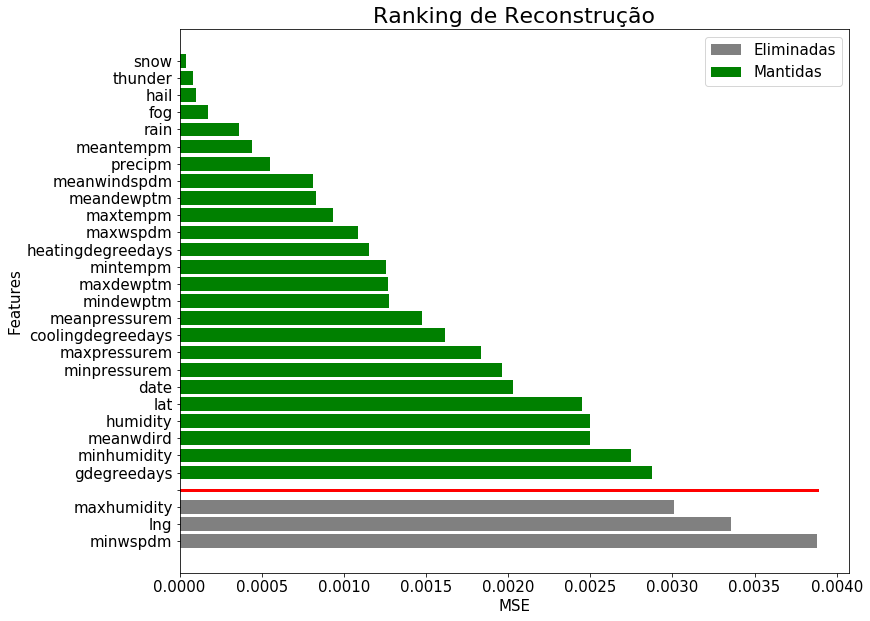

In [43]:
bads = []
values = []
rank = []
rankv = []
# Ranqueia
for b in sorted(score, key = score.get,reverse=True):
    rank.append(b)
    rankv.append(score[b])
    
# Separa as ruins
for a in sorted(score, key = score.get,reverse=True):
    if(score[a] > 0.003):
        print(a,score[a])
        bads.append(a)
        values.append(score[a])
        rank.remove(a)
        rankv.remove(score[a])

# Plota gráfico de barras horizontais
plt.figure(figsize=(12,10))
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
plt.title(u"Ranking de Reconstrução")
plt.xlabel("MSE")
plt.ylabel("Features")
plt.plot([0,np.max(values)],[len(bads),len(bads)],c='r',linewidth=3)
bads.append('')
values.append(0)
plt.barh(bads,values,color='grey',label='Eliminadas')
plt.barh(rank,rankv,color='green',label='Mantidas')
plt.legend()
plt.show()

In [22]:
bads.remove('')
bads.remove('lng')
for b in bads:
    df_atmes.drop(b,axis=1,inplace=True)
df_atmes.describe()

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,maxtempm,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,mintempm
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,...,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,0.424391,0.313392,0.639710,0.046453,0.005220,0.417656,0.068422,0.625303,0.101475,0.478729,...,0.511441,0.080880,0.491284,0.001203,0.690873,0.102965,0.007375,0.717266,0.384928,0.721173
std,0.130429,0.172311,0.085021,0.207810,0.071755,0.188882,0.151484,0.116721,0.104713,0.126506,...,0.089104,0.047088,0.118210,0.033156,0.119145,0.049627,0.031161,0.099060,0.318295,0.097727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.363636,0.207383,0.620315,0.000000,0.000000,0.270833,0.000000,0.549020,0.000000,0.398776,...,0.455882,0.047619,0.408163,0.000000,0.596154,0.075000,0.000000,0.648148,0.000000,0.655172
50%,0.363636,0.301612,0.627941,0.000000,0.000000,0.406250,0.000000,0.647059,0.078947,0.484754,...,0.514706,0.076190,0.489796,0.000000,0.711538,0.100000,0.000000,0.722222,0.401662,0.724138
75%,0.454545,0.358735,0.651912,0.000000,0.000000,0.541667,0.000000,0.705882,0.157895,0.564095,...,0.573529,0.104762,0.571429,0.000000,0.788462,0.130000,0.000000,0.777778,0.645429,0.793103
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_atmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 26 columns):
date                 3675 non-null float64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3675 non-null float64
snow                 3675 non-null float64
minhumidity          3675 non-null float64
coolingdegreedays    3675 non-null float64
maxdewptm            3675 non-null float64
heatingdegreedays    3675 non-null float64
meanpressurem        3675 non-null float64
rain                 3675 non-null float64
fog                  3675 non-null float64
humidity             3675 non-null float64
gdegreedays          3675 non-null float64
mindewptm            3675 non-null float64
minpressurem         3675 non-null float64
maxtempm             3675 non-null float64
meanwindspdm         3675 non-null float64
maxpressurem         3675 non-null float64
hail                 3675 non-null float64
meandewptm           3675 non-nul

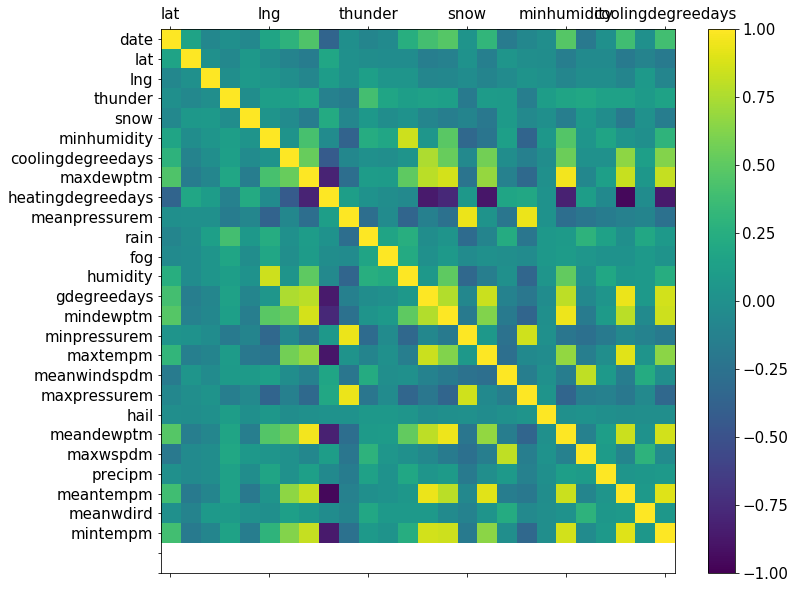

In [24]:
# Plota matriz de correlação
# Quanto mais correlacionadas duas features, mais forte é a cor de interseção entre elas
# crescem justas na mesma direção = bem correlacionadas
# crescem em direções opostas = mal correlacionadas
plt.rc('font', size=15)
plt.rc('axes', titlesize=22)
correlations = df_atmes.corr()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,input_dim,1)
ax.set_yticks(ticks)
ax.set_xticklabels(df_atmes.columns)
ax.set_yticklabels(df_atmes.columns)
plt.show()

## Treinamento de Rede Final com as features selecionadas

In [25]:
input_dim = len(df_atmes.columns)
input_dim

26

In [26]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.2)(encoded1)
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [27]:
# Cria o modelo para a rede anteriormente montada
final_autoencoder = Model(entrada,decoded)

In [28]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
final_autoencoder.compile(optimizer='adam', loss='mse')

In [29]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [30]:
batch = len(df_atmes)//10
batch
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [31]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history = final_autoencoder.fit(X_trainAtMes, X_trainAtMes,
                epochs=3000,
                batch_size=batch,
                shuffle=True,
                validation_data=(X_testAtMes, X_testAtMes),
                callbacks=[es])

Train on 2572 samples, validate on 1103 samples
Epoch 1/3000
2572/2572 [==============================] - 1s 301us/step - loss: 0.1390 - val_loss: 0.1280
Epoch 2/3000
2572/2572 [==============================] - 0s 11us/step - loss: 0.1325 - val_loss: 0.1232
Epoch 3/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1272 - val_loss: 0.1185
Epoch 4/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1224 - val_loss: 0.1150
Epoch 5/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1180 - val_loss: 0.1114
Epoch 6/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1137 - val_loss: 0.1081
Epoch 7/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.1100 - val_loss: 0.1047
Epoch 8/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.1063 - val_loss: 0.1013
Epoch 9/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.1028 - val_loss: 0.0984
Epoch 

2572/2572 [==============================] - 0s 14us/step - loss: 0.0104 - val_loss: 0.0086
Epoch 78/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0103 - val_loss: 0.0085
Epoch 79/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0084
Epoch 80/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0083
Epoch 81/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0101 - val_loss: 0.0082
Epoch 82/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0100 - val_loss: 0.0081
Epoch 83/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0099 - val_loss: 0.0080
Epoch 84/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0098 - val_loss: 0.0079
Epoch 85/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0096 - val_loss: 0.0078
Epoch 86/3000
2572/2572 [==============================] - 0

Epoch 154/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0061 - val_loss: 0.0043
Epoch 155/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0042
Epoch 156/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 157/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 158/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0062 - val_loss: 0.0042
Epoch 159/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0041
Epoch 160/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0060 - val_loss: 0.0041
Epoch 161/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0041
Epoch 162/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0061 - val_loss: 0.0041
Epoch 163/3000
2572/2572 [===========

2572/2572 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 231/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 232/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0050 - val_loss: 0.0030
Epoch 233/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 234/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 235/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 236/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 237/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0049 - val_loss: 0.0029
Epoch 238/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0050 - val_loss: 0.0029
Epoch 239/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0046 - val_loss: 0.0024
Epoch 307/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 308/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0045 - val_loss: 0.0025
Epoch 309/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 310/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0045 - val_loss: 0.0024
Epoch 311/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 312/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0043 - val_loss: 0.0024
Epoch 313/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0044 - val_loss: 0.0024
Epoch 314/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0044 - val_loss: 0.0024
Epoch 315/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0023
Epoch 383/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0023
Epoch 384/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 385/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 386/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 387/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 388/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 389/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 390/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 391/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 459/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 460/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 461/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 462/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 463/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 464/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 465/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 466/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 467/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 535/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 536/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 537/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 538/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0037 - val_loss: 0.0020
Epoch 539/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 540/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 541/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 542/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 543/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 611/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 612/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 613/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 614/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 615/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 616/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 617/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0037 - val_loss: 0.0018
Epoch 618/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 619/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 12us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 687/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0017
Epoch 688/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 689/3000
2572/2572 [==============================] - 0s 12us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 690/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 691/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 692/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0018
Epoch 693/3000
2572/2572 [==============================] - 0s 14us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 694/3000
2572/2572 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 695/3000
2572/2572 [==========================

2572/2572 [==============================] - 0s 22us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 763/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 764/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 765/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 766/3000
2572/2572 [==============================] - 0s 17us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 767/3000
2572/2572 [==============================] - 0s 25us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 768/3000
2572/2572 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 769/3000
2572/2572 [==============================] - 0s 21us/step - loss: 0.0036 - val_loss: 0.0017
Epoch 770/3000
2572/2572 [==============================] - 0s 23us/step - loss: 0.0035 - val_loss: 0.0017
Epoch 771/3000
2572/2572 [==========================

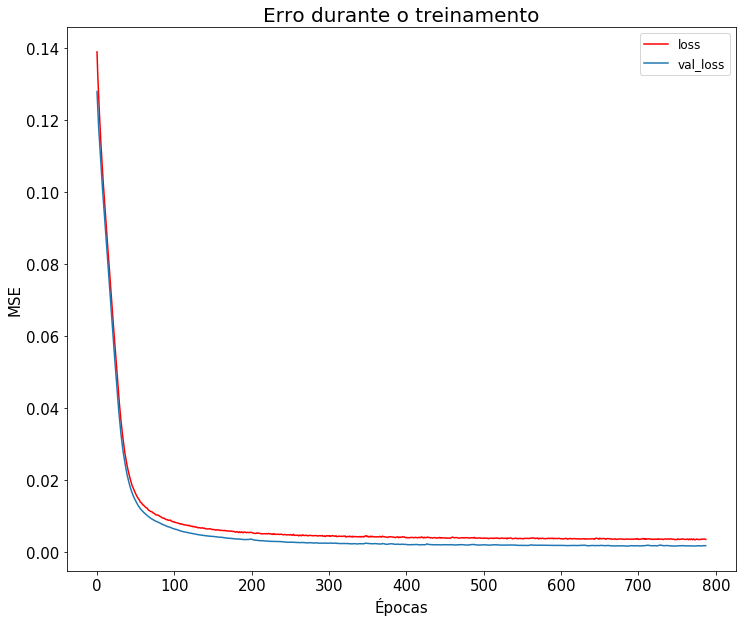

In [32]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history.history['loss'],color='r',label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [33]:
# Faz a previsão para a base de teste
testeAtMes = final_autoencoder.predict(X_testAtMes)

In [34]:
# Calcula o erro (MSE) para o teste
final_autoencoder.evaluate(x=X_testAtMes, y=X_testAtMes, batch_size=attest_dim)

1103/1103 [==============================] - 0s 20us/step


0.0016632383167473489

In [35]:
# Calcula o erro (MSE) para o treino
final_autoencoder.evaluate(x=X_trainAtMes, y=X_trainAtMes, batch_size=batch)

2572/2572 [==============================] - 0s 9us/step


0.0016841523149088793

# Variational Autoencoder